In [1]:
import matplotlib.pyplot as plt
import math
import random
import numpy as np

The following codes used in this notebook was made available in moodle page of my student account

# 1. Points and Distances

In [2]:
def dist(p1, p2):
    (x1, y1) = p1
    (x2, y2) = p2
    return int(math.sqrt((x1-x2)**2+(y1-y2)**2))

# 1.1. Maps

In [3]:
def plotMap(G, T=[], P=[], W=None,
            style='r-o', lw=1, ms=3, 
            styleT='go', msT=5,
            styleP='b-o', lwP=3, msP=1,
            stylePT='go', msPT=7,
            styleW='bo', msW=7,
            text=None, grid=False):
    fig = plt.gcf()
    fig.set_size_inches(6, 6)
    V, E = G

    if not grid:
        plt.axis('off')
    plt.plot( [ p[0] for p in V ], [ p[1] for p in V ], 'ro', lw=lw, ms=ms)
    for (p, q) in E:
        plt.plot( [ p[0], q[0] ], [ p[1], q[1] ], 'r-o', lw=lw, ms=ms)
    for t in T:
        plt.plot( [ t[0] ], [ t[1] ], 
                  styleT, ms=msT)
    plt.plot( [ p[0] for p in P ],
              [ p[1] for p in P ], 
              styleP, lw=lwP, ms=msP)
    for p in P:
        if p in T:
            plt.plot( [ p[0] ], [ p[1] ], 
                      stylePT, ms=msPT)
    if W is not None:
        plt.plot( [ W[0] ], [ W[1] ], 
                      styleW, ms=msW)
    if text is not None:
        maxX = max([p[0] for p in V])
        plt.text(0.8*maxX, 0, text)
    if grid:
        plt.grid()
    plt.show()

# 1.2 Add Targets

In [4]:
def addTargets(M, T):
    V, E = M
    E = E.copy()
    V = V.copy()
    for t in T:
        minD = math.inf
        minE = None
        for e in E:
            P, Q = e
            distT = dist(P, t)+dist(t, Q)-dist(P, Q)
            if distT < minD:
                minD = distT
                minE = e
        P, Q = minE
        E.remove( (P, Q) )
        E.append( (P, t) )
        E.append( (t, Q) )
        V.append(t)
    return V, E

# 1.3. Generate Warehouse Locations

In [5]:
def generateWarehouseLocation(M):
    V, _ = M
    W = random.sample(V, k=1)[0]
    return W

# 2. Loading Sample Data

In [6]:
import pickle
with open('data.pickled', 'rb') as f:
    M, C = pickle.load(f)

Split the maps into Vertices and Edges:

In [7]:
V, E = M

I am using the last 4 digit of my student numeber as the seed number for a random location for the Warehouse at one of the intersections (vertices) on the map.

In [8]:
W = generateWarehouseLocation(M)

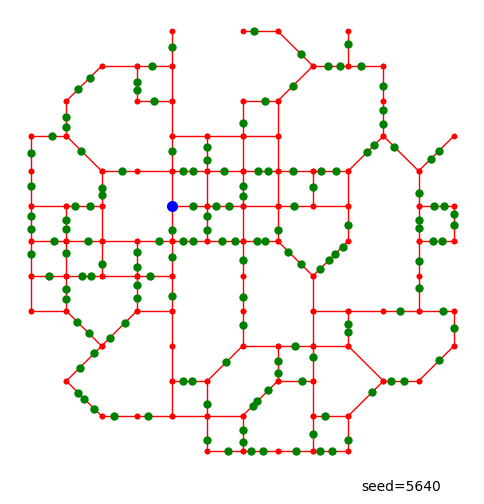

In [9]:
plotMap(M, T=C, P=[], W=W, text="seed=5640")

# 3. Generating Delivery Data

In [10]:
def generateDeliveryData(p, C, n, seed=5640):
    # Parameters for simulation
    # p = 0.15 represent the average number of parcels per day per customer
    # C = 10 represent the number of customers to be served
    # n = represent the number of days for which data are to be generated
    np.random.seed(seed)
    R = np.random.poisson(lam=C*p, size=n)
    D = [ sorted(list(np.random.choice(range(C), size=i))) for i in R ]
    return D

In [11]:
D = generateDeliveryData(0.15, 150, 7)
D

[[4, 8, 9, 25, 46, 50, 53, 55, 55, 56, 64, 65, 67, 73, 99, 110, 143],
 [6,
  7,
  13,
  37,
  37,
  39,
  40,
  51,
  55,
  57,
  63,
  86,
  90,
  90,
  93,
  94,
  95,
  125,
  138,
  147],
 [9, 13, 19, 24, 32, 42, 44, 45, 51, 58, 62, 70, 97, 112, 130],
 [7,
  10,
  21,
  22,
  23,
  25,
  27,
  32,
  43,
  49,
  61,
  62,
  74,
  74,
  82,
  82,
  85,
  86,
  90,
  90,
  94,
  97,
  102,
  107,
  107,
  113,
  117,
  124,
  125,
  129,
  138,
  144],
 [6, 16, 30, 34, 36, 44, 46, 47, 55, 88, 100, 131, 134, 145, 145],
 [5, 12, 33, 42, 43, 51, 51, 51, 66, 91, 91, 93, 94, 123, 127, 132, 147, 149],
 [10,
  11,
  16,
  16,
  21,
  27,
  30,
  41,
  46,
  47,
  54,
  63,
  63,
  79,
  79,
  93,
  104,
  106,
  110,
  117,
  124,
  127,
  132,
  134,
  141,
  147]]

In [12]:
sum([len(i) for i in D])

143

Over a period of 7 days, a total of 143  parcels are to be delivered:

- On the First day deliver 1 parcel each was to customers 4, 8, 9, 25, 46, 50, 53, 56, 64, 65, 67, 73, 99, 110, 143. Customer 55 receives 2 parcels
- On the second day deliver 1 parcel each to customers 6, 7, 13, 39, 40, 51, 55, 57, 63, 86, 93, 94, 95, 125, 138, 147. Customers 37 and 90 each receive 2 parcels.
- On the third day deliver 1 parcel each to customers 9, 13, 19, 24, 32, 42, 44, 45, 51, 58, 62, 70, 97, 112, 130.
- On the fourth day deliver 1 parcel each to customers 7, 10, 21, 22, 23, 25, 27, 32, 43, 49, 61, 62, 85, 86, 94, 97, 102, 113, 117, 124, 125, 129, 138, 144. Customers 74, 82, 90, 107 each receive 2 parcels.
- On the fifth day deliver 1 parcel each to customers 6, 16, 30, 34, 36, 44, 46, 47, 55, 88, 100, 131, 134. Customer 145 receives 2 parcels.
- On the sixth day deliver 1 parcel each to customers 5, 12, 33, 42, 43, 66, 94, 123, 127, 132, 147, 149. Customer 51 receives 3 parcels. Customers 91, 93 each receive 2 parcels.
- On the seventh day deliver 1 parcel each to customers 10.


# 4. Delivery over 20 days for Map

In [13]:
D = generateDeliveryData(0.15, len(C), 20)

In [14]:
sum([len(i) for i in D])

469

# 4.1. Delivery over one Month for Map

In [15]:
D = generateDeliveryData(0.15, len(C), 30)

In [16]:
sum([len(i) for i in D])

677